In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data  # 特征矩阵（形状：n_samples × n_features）
y = data.target  # 目标变量（连续值）
print(X.shape, y.shape)

(442, 10) (442,)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(442, 10)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2,   # 测试集占比 20%
    random_state=42  # 确保结果可复现
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [8]:
model = LinearRegression()  # 初始化模型
model.fit(X_train, y_train)  # 训练模型

LinearRegression()

In [9]:
y_pred = model.predict(X_test)  # 预测测试集
print(y_pred.shape)

(89,)


In [10]:
# 计算均方误差（MSE）和 R² 分数
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"均方误差 (MSE): {mse:.2f}")
print(f"R² 分数: {r2:.2f}")

# 输出模型系数和截距
print("模型系数:", model.coef_)
print("截距项:", model.intercept_)

均方误差 (MSE): 2900.19
R² 分数: 0.45
模型系数: [  1.80291044 -11.50907105  25.80070495  16.53858529 -44.30640613
  24.64170961   7.77309591  13.09553713  35.01740872   2.31502709]
截距项: 151.34560453985992


In [11]:
from sklearn.model_selection import cross_val_score

# 使用5折交叉验证评估R²分数
cv_scores = cross_val_score(
    model, 
    X_scaled, 
    y, 
    cv=5, 
    scoring='r2'
)
print(f"交叉验证 R² 分数: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

交叉验证 R² 分数: 0.48 ± 0.05


/home/zsh/miniconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zsh/miniconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zsh/miniconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zsh/miniconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zsh/miniconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170:

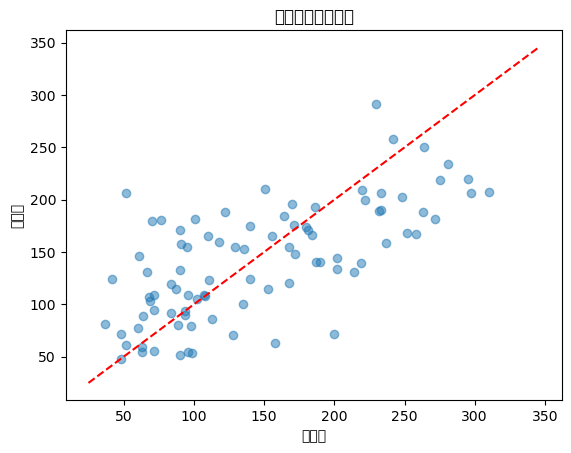

In [13]:
import matplotlib.pyplot as plt

# 绘制真实值与预测值的对比图
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.title("线性回归预测结果")
# 绘制理想对角线
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [14]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # 调整alpha参数
ridge_model.fit(X_train, y_train)

Ridge()

In [17]:
y_pred = ridge_model.predict(X_test)  # 预测测试集
print(y_pred.shape)

# 计算均方误差（MSE）和 R² 分数
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"均方误差 (MSE): {mse:.2f}")
print(f"R² 分数: {r2:.2f}")

# 输出模型系数和截距
print("模型系数:", ridge_model.coef_)
print("截距项:", ridge_model.intercept_)

(89,)
均方误差 (MSE): 2892.03
R² 分数: 0.45
模型系数: [  1.85708085 -11.4462675   25.92385482  16.44844861 -34.59704195
  17.08172473   3.42720384  11.73051093  31.26468212   2.41992383]
截距项: 151.3389656204565


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # 二次多项式
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression().fit(X_poly, y_train)